# MARKETING ANALYSIS AND SALES REVENUE PREDICTION

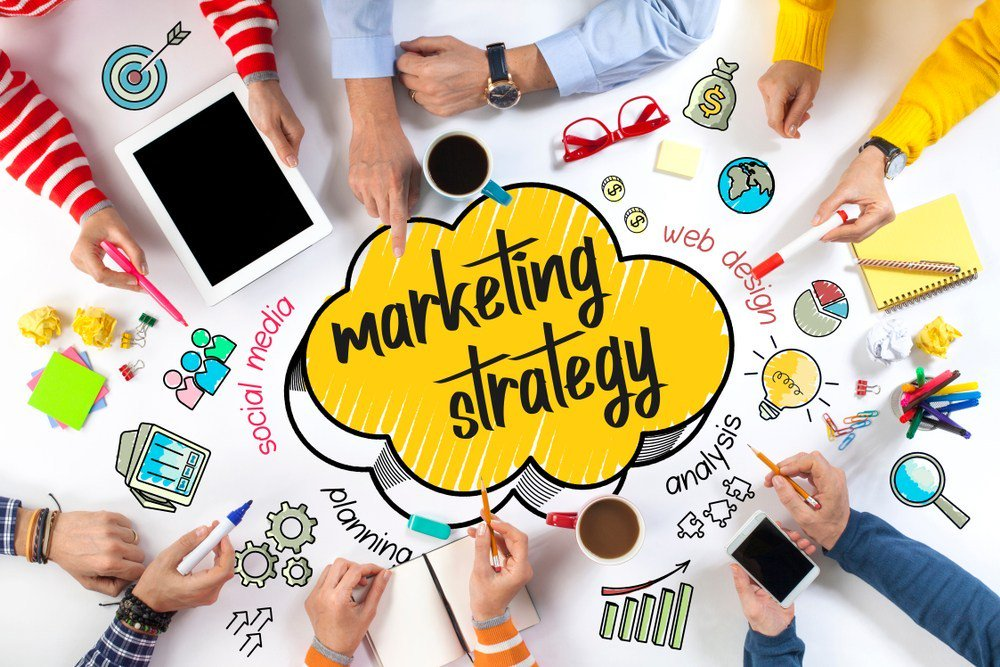

In [1]:
from IPython.display import Image
Image(filename='marketing-stregy.jpg', width=1000, height=1000)

# TABLE OF CONENT

1. Objectives
2. Importing Libraries
3. Data Collection 
4. Exploratory Data Analysis
5. Feature Engineering
6. Modeling 
7. Conclusion

# 1. Objectives

- To analyse data and gain insights into the relationships between advertising budgets and sales revenue. 

- To build a predictive model that can estimate or predict sales revenue based on the advertising budget allocated to these channels.


# 2. Importing Libraries 

In [2]:
#Importing libraries for data cleaning, processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express  as px

#Importing libaries for machine learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor


# 3.  Data Collection

In [3]:
df=pd.read_csv('train.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


**Observation:** 

- The dataframe consists of five features namely Television, radio, Social Media, Influencer and sales.
- The TV promotion budget, Social Media promotion budget, Radio promotions and sales are in millions

**Checking more information about thw data Frame**

In [4]:
#Data Details set
def features_attributes(df):
    df1=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        percent_missing = ((sum_null)* 100 / len(df))
        top_value =df[col].mode()[0]
        df1.append([col,dtypes,nunique,sum_null, percent_missing, top_value])
    df1=pd.DataFrame(df1)
    df1.columns=['Feature names','data types','number of unique','sum of null values', 'Missing value %', 'Top value']
    return df1 
features_attributes(df)

,Feature names,data types,number of unique,sum of null values,Missing value %,Top value
0,TV,float64,91,10,0.218723,43.0
1,Radio,float64,4568,4,0.087489,0.000684
2,Social Media,float64,4566,6,0.131234,0.000031
3,Influencer,object,4,0,0.000000,Mega
4,Sales,float64,4566,6,0.131234,31.199409


# 4. Exploratory Data Analysis

**4.1 Distribution of Radio, TV and social media budget and sales revenue**

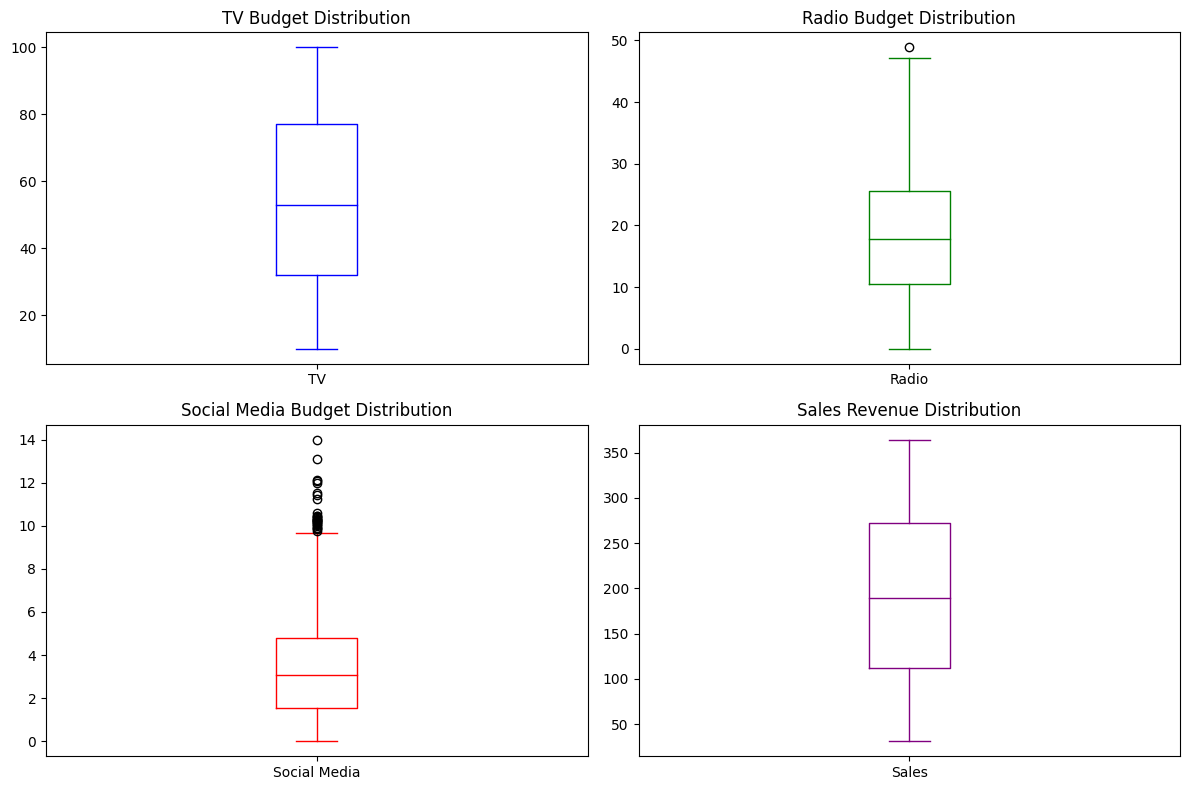

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for TV, Radio, Social Media, and Sales
df['TV'].plot(kind='box', ax=axes[0, 0], title='TV Budget Distribution', color='blue')
df['Radio'].plot(kind='box', ax=axes[0, 1], title='Radio Budget Distribution', color='green')
df['Social Media'].plot(kind='box', ax=axes[1, 0], title='Social Media Budget Distribution', color='red')
df['Sales'].plot(kind='box', ax=axes[1, 1], title='Sales Revenue Distribution', color='purple')

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation**

- **Television budget:** Television budget has the largest range compared to other marketing strategy. Moreover, the data is evenly distributed without the presence of outliers.This suggest while television campaigns may be costly,  they tend to follow a more consistent budget range without extreme values. Moreover, the budget is evenly distributed. 
- **Radio budget:** Radio budget ranges from 0 to 50 million and the budget is positively skewed.. The positive skewness indicates that the majority of radio marketing budgets fall on the lower end of the spectrum, with a longer tail to the right, indicating some instances of higher budgets.
- **Social Media:** The boxplot illustrates that social Media is the one that has very low budget. Moreover, social media budget is skewed to the left and has outliers ranging from 10 to 14 million. The skewness to the left suggests that a majority of social media budgets are concentrated toward the lower end of the range, with a long tail on the higher side due to the outliers.  
- **Sales revenue:**  Sales revenue is evently distributed, with lowest revenue below 50 million and highest revenue generated above 350 million. This suggests that the effectiveness of different marketing strategies varies, with some campaigns generating relatively low revenue and others being highly successful.

**4.2 Scatter Plots of the relationship between Budgets and sales**

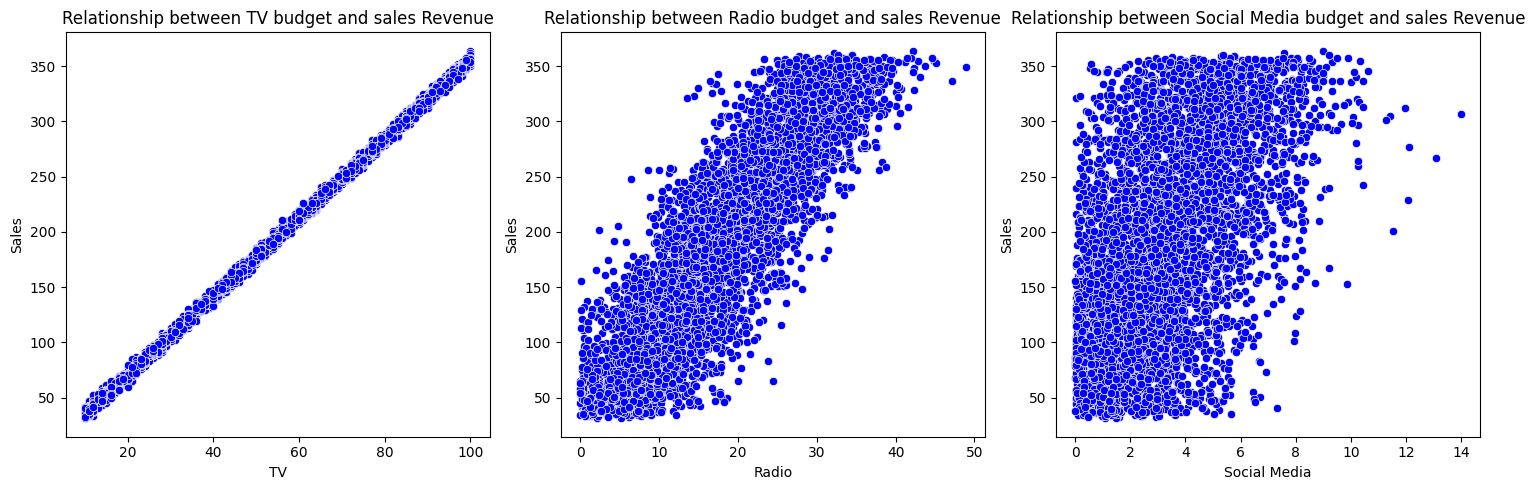

In [6]:
# Setting up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

columns=['TV', 'Radio', 'Social Media']
# Creating scatter plots in each subplot
for i, column in enumerate(columns):
    sns.scatterplot(x=df[column], y=df['Sales'], ax=axes[i], color='blue', marker='o')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sales')
    axes[i].set_title(f'Relationship between {column} budget and sales Revenue')

# Adjusting layout
plt.tight_layout()

# Showing the plots
plt.show()

**Observation**

- **Television budget and sales revenue** The strong positive correlation between television budget and sales revenue suggests that when a company invests more in television advertising, it tends to see a corresponding increase in sales revenue. This could be because television advertising is often more effective in reaching a broad audience, and the investment in this channel leads to higher brand visibility and, consequently, increased sales. 
- **Radio budget and sale revenue:**  Similarly, the observed correlation between radio budget and sales revenue indicates that there is a connection between the amount allocated to radio advertising and the resulting revenue. While the correlation may not be as strong as with television, it still suggests that radio advertising can be an effective marketing strategy for driving sales.
- **Social media and sale revenue:**  The relatively weak correlation between social media budget and sales revenue suggests that, in this dataset, there isn't a strong relationship between the amount spent on social media advertising and the resulting sales revenue.  While social media can be a valuable tool for brand building and engagement, its direct impact on immediate sales revenue might be less pronounced compared to traditional channels like television and radio.

**4.3 Distribution of Influencers**

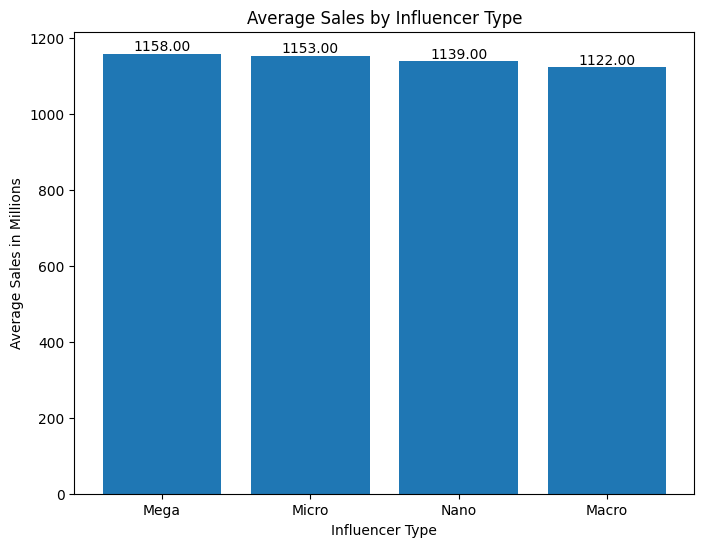

In [7]:
#Counts of each Influencer type
DF=pd.DataFrame(df['Influencer'].value_counts().reset_index())

#Plotting the Bar Graph
plt.figure(figsize=(8, 6))
bars = plt.bar(DF['Influencer'], DF['count'])

# Adding the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')
    
# Title and labels
plt.title('Average Sales by Influencer Type')
plt.xlabel('Influencer Type')
plt.ylabel('Average Sales in Millions')

# Displaying the plot
plt.show()

**Observation**

- Most Mega influencer where used compared to other influencers.The Mega influencers are the  top of the influencer hirarchy with follower counts often exceeding several million.
-   Macro-influencers were the type of influencer that where used least. This influencer has the followingranging from 100,000 to several million followers.

**4.4 Bar Graph showing the Average sales revenue for different influencers**

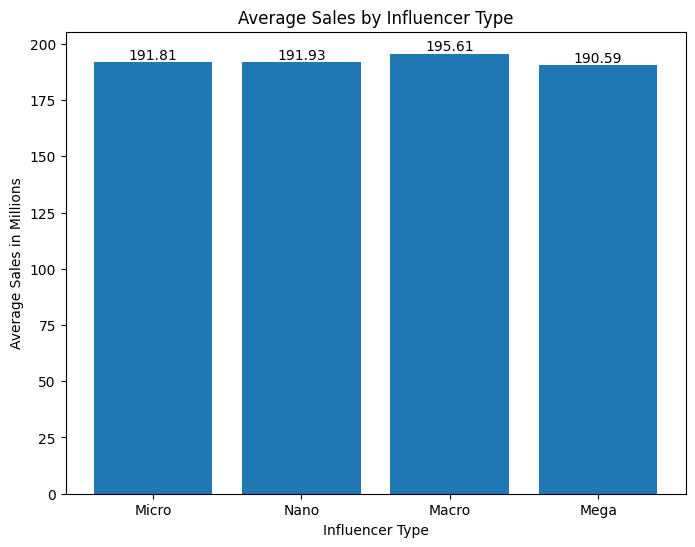

In [8]:

# Filtering data for each event type
Micro = df[df['Influencer'] == 'Micro']
Nano = df[df['Influencer'] == 'Nano']
Macro= df[df['Influencer'] == 'Macro']
Mega = df[df['Influencer'] == 'Mega']

# Calculate revenue sums for each event type
sales = {
    'Micro': Micro['Sales'].mean(),
    'Nano': Nano['Sales'].mean(),
    'Macro': Macro['Sales'].mean(),
    'Mega': Mega['Sales'].mean()
}

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(sales.keys(), sales.values())

# Adding the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')

# Title and labels
plt.title('Average Sales by Influencer Type')
plt.xlabel('Influencer Type')
plt.ylabel('Average Sales in Millions')

# Displaying the plot
plt.show()

**Observation:**

- Though many Mega Influencers where used compared to other influencer,  the average sale revenue is the lowest compared to other influencers. 
- Meanwhile, Though Macro Influencer were the one that were used least, it is the one that have the highest average sales revenue with a 3.5 million  difference from other influencers average sales revenue.
- The similarity in average sales revenue between micro and nano influencers can be explained by their shared characteristics. Both micro and nano influencers often operate within specific niches or communities.


# 5. Feature Engineering

**5.1 Dropping rows with Null values**

Since the amount of missing data doesn't even account to 5% of the data, dropping the values wont make any significant change.  

In [9]:
df=df.dropna()
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

**5.2 Seperating the predictors and response variables**

In [10]:
y=df['Sales']
df.drop(columns=['Sales'], inplace=True)
df.head()

,TV,Radio,Social Media,Influencer
0,16.0,6.566231,2.907983,Mega
1,13.0,9.237765,2.409567,Mega
2,41.0,15.886446,2.913410,Mega
3,83.0,30.020028,6.922304,Mega
4,15.0,8.437408,1.405998,Micro


**5.3 Encoding Categorical data**

In [11]:
#Building an encoder
encoder=OrdinalEncoder()
#Applying an encoder to the data
df[['Influencer']]=encoder.fit_transform(df[['Influencer']])
Df=df

**5.4 Standardization of Predictors**

In [12]:
st=StandardScaler()
x=st.fit_transform(df)

**5.5 Spliting the data into training and testing data**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. Modeling

**Building Different Models**

In [14]:
#Linear Regression
lr= LinearRegression()
#Lasso Regression
lsr=Lasso()
#Ridge Regression
rr= Ridge(alpha=0.1)
#Support Vector Machine
sr=SVR(kernel='linear', C=100)
#Decision Tree
dtr=DecisionTreeRegressor(max_depth=7, random_state=42)
#Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)

**Fitting different model to training data**

In [15]:
#Linear Regression
lr.fit(x_train,y_train)
#Ridge Regression
lsr.fit(x_train,y_train)
#Ridge Regression
rr.fit(x_train,y_train)
#Support Vector Machine
sr.fit(x_train, y_train)
#Decision Tree
dtr.fit(x_train,y_train)
#Random Forest
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

**Predicting on the training data**

In [16]:
#Linear Regression
lr_y_train = lr.predict(x_train)
#Lasso Regression
lsr_y_train = lsr.predict(x_train)
#Ridge Regression
rr_y_train = rr.predict(x_train)
#Support Vector Machine
sr_y_train = sr.predict(x_train)
#Decision Tree
dtr_y_train = dtr.predict(x_train)
#Random Forest
rfr_y_train = rfr.predict(x_train)

**Predicting on the Testing data**

In [17]:
#Linear Regression 
lr_y_testing = lr.predict(x_test)
#Lasso Regression 
lsr_y_testing = lsr.predict(x_test)
#Ridge Regression 
rr_y_testing = rr.predict(x_test)
#Support Vector Machine
sr_y_testing = sr.predict(x_test)
#Decision tree Regression 
dtr_y_testing = dtr.predict(x_test)
#Random Forest Regressor 
rfr_y_testing = rfr.predict(x_test)

**R squared score on Training data**

In [18]:
#Linear Regression
print('Linear Regression:', r2_score(y_train, lr_y_train))
#Lasso Regression
print('Lasso Regression:', r2_score(y_train, lsr_y_train))
#Ridge Regression
print('Ridge Regression:', r2_score(y_train, rr_y_train))
#Support Vector Machine
print('Support Vector Machine: :', r2_score(y_train, sr_y_train))
#Decision Tree
print('Decision Tree:', r2_score(y_train, dtr_y_train))
#Random Forest
print('Random Forest:', r2_score(y_train, rfr_y_train))

Linear Regression: 0.9989911802100335
Lasso Regression: 0.9988768417414116
Ridge Regression: 0.9989911771642737
Support Vector Machine: : 0.9989908578496549
Decision Tree: 0.9990736489014835
Random Forest: 0.9988349261976638


**R Squared score on Testing data**

In [19]:

#Linear Regression
print('Linear Regression:', r2_score(y_test, lr_y_testing))
#Lasso Regression
print('Lasso Regression:', r2_score(y_test, lsr_y_testing))
#Ridge Regression
print('Ridge Regression:', r2_score(y_test, rr_y_testing))
#Support Vector Machine
print('Support Vector Machine:', r2_score(y_test, sr_y_testing))
#Decision Tree
print('Decision Tree:', r2_score(y_test, dtr_y_testing))
#Random Forest
print('Random Forest:', r2_score(y_test, rfr_y_testing))

Linear Regression: 0.9990104455954855
Lasso Regression: 0.9989095560695348
Ridge Regression: 0.9990105039013415
Support Vector Machine: 0.999011682929434
Decision Tree: 0.9988811301868865
Random Forest: 0.998774128200137


**Root mean squared error on Training data**

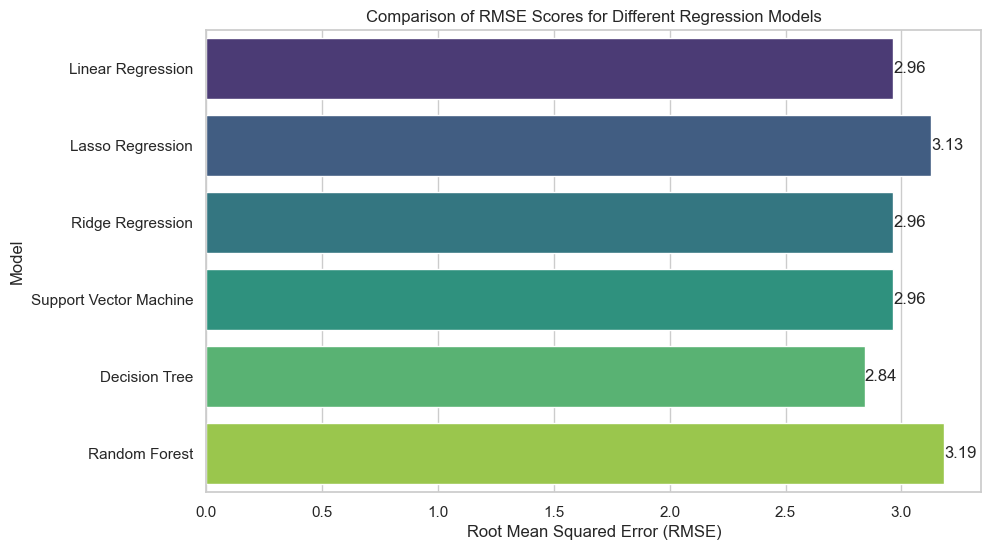

In [20]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
          'Support Vector Machine', 'Decision Tree', 'Random Forest']

rmse_scores = [np.sqrt(mean_squared_error(y_train, lr_y_train)), np.sqrt(mean_squared_error(y_train, lsr_y_train)), np.sqrt(mean_squared_error(y_train, rr_y_train)),np.sqrt(mean_squared_error(y_train, sr_y_train)), np.sqrt(mean_squared_error(y_train, dtr_y_train)), np.sqrt(mean_squared_error(y_train, rfr_y_train))]

data = {'Model': models, 'RMSE': rmse_scores}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.barplot(x='RMSE', y='Model', data=df, palette="viridis")
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')
plt.title('Comparison of RMSE Scores for Different Regression Models')

# Annotate bars with RMSE values
for index, value in enumerate(rmse_scores):
    plot.text(value, index, f'{value:.2f}', va='center')

plt.show()

**Observation**
- Root mean squared error is measure of the differences between values predicted by a model  and the values observed. The smaller the value, the better the model. 
- The graph above illustrates that Decision tree is the best model  compared to the other models on predicting on the training data. 

**Root mean squared error on Training data**

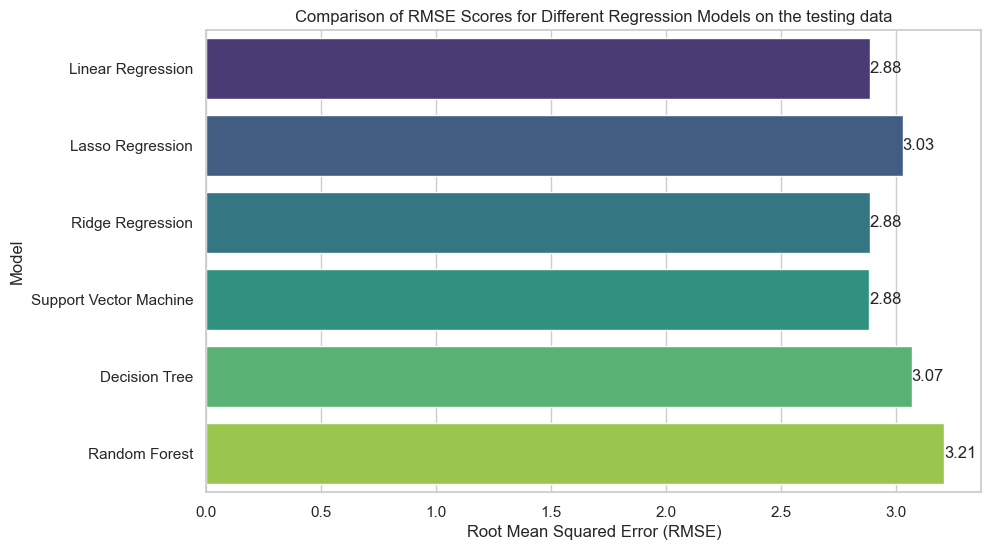

In [21]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
          'Support Vector Machine', 'Decision Tree', 'Random Forest']

rmse_scores = [np.sqrt(mean_squared_error(y_test, lr_y_testing)), np.sqrt(mean_squared_error(y_test, lsr_y_testing)), np.sqrt(mean_squared_error(y_test, rr_y_testing)),np.sqrt(mean_squared_error(y_test, sr_y_testing)), np.sqrt(mean_squared_error(y_test, dtr_y_testing)), np.sqrt(mean_squared_error(y_test, rfr_y_testing))]

data = {'Model': models, 'RMSE': rmse_scores}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.barplot(x='RMSE', y='Model', data=df, palette="viridis")
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')
plt.title('Comparison of RMSE Scores for Different Regression Models on the testing data')

# Annotate bars with RMSE values
for index, value in enumerate(rmse_scores):
    plot.text(value, index, f'{value:.2f}', va='center')

plt.show()

**Observation**

- The graph above illustrates that the best model predicting on unseen data is the ridge regression, Linear regression and support vector machine. 
- It is important to consider overfitting when choosing the best model. Overfitting is when the machine learning model gives accurate predictions for training data but not for new data. Decision tree was overfitted, it has a smaller RMSE score on the training and bigger RMSE score on the testing data. 
- Ridge regression, Linear regression and support vector machine are the best model, having equal score of

**Graph showing the relationship between actual and predicted data points**

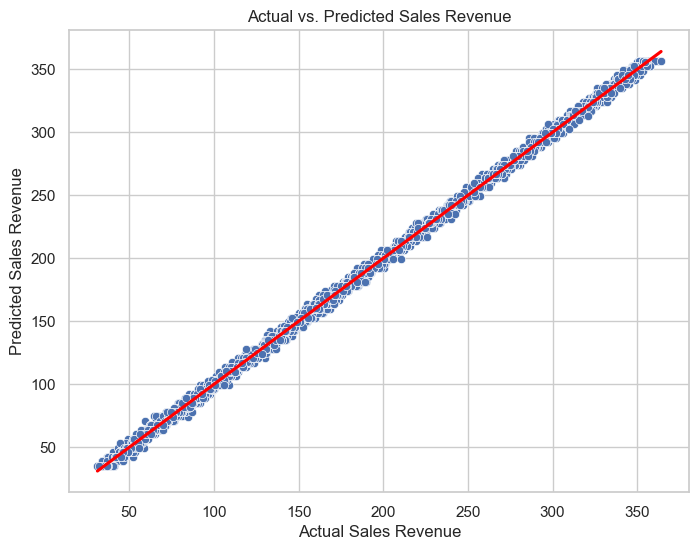

In [22]:
# Assuming you have actual and predicted sales revenue in 'actual' and 'predicted' lists
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=sr_y_train)
sns.regplot(x=y_train, y=sr_y_train, scatter=False, color='red')
plt.xlabel('Actual Sales Revenue')
plt.ylabel('Predicted Sales Revenue')
plt.title('Actual vs. Predicted Sales Revenue')
plt.show()

**Feature Importance**

<BarContainer object of 4 artists>

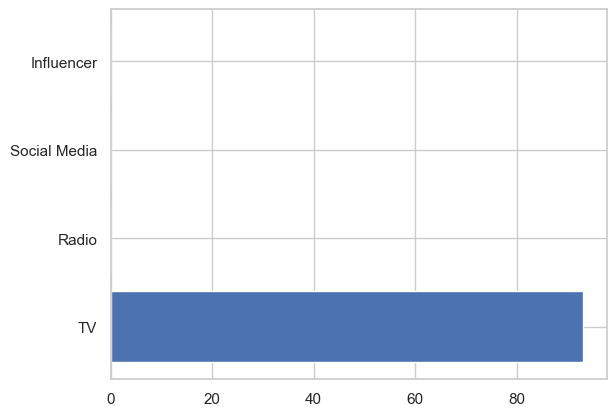

In [39]:
DF=pd.DataFrame((abs(lr.coef_)),(Df.columns)).reset_index()
DF.rename(columns={"index": "Marketing strategy", 0:'Coefficient'}, inplace=True)
plt.barh(y=DF['Marketing strategy'], width=DF['Coefficient'])

**Observations**

- Feature importance is a technique that assigns a score to input features based on how useful they are at predicting a target variable. From the above graph it is obvious that Television has the highest score. 